<a href="https://colab.research.google.com/github/victorhss21/Estudos_CD/blob/main/Algoritimos_de_Parti%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. O que é? (Motivação para criação & O que se propõe a resolver)**

*   **Motivação:** A necessidade fundamental de encontrar estrutura intrínseca em dados *não rotulados* é uma pedra angular da aprendizagem não supervisionada. Em muitos cenários do mundo real, não temos categorias pré-definidas para os dados. Queremos descobrir "grupos" ou "clusters" naturais com base apenas nas características (features) das observações. O K-Means surgiu como uma **resposta heurística, computacionalmente eficiente e intuitiva para este problema de agrupamento por partição**. A ideia era desenvolver um método simples que pudesse dividir um conjunto de dados em um número *k* de **grupos distintos** e **não sobrepostos**.
*   **O que se propõe a resolver:** O K-Means visa particionar um conjunto de *n* observações em *$k$* clusters pré-definidos, onde **cada observação pertence ao cluster cujo centroide (média dos pontos no cluster) é o mais próximo**. Formalmente, ele busca minimizar a **inércia** ou **soma dos quadrados dentro do cluster (Within-Cluster Sum of Squares - WCSS)**. A função objetivo é:
$$
argmin_C Σ_{i=1}^{k} Σ_{x ∈ C_i} ||x - μ_i||²
$$
    Onde:
    *   $C = {C_1, C_2, ..., C_k}$ é o conjunto de clusters.
    *   $μ_i$ é o centroide (média) dos pontos no cluster $C_i$.
    *   $||x - μ_i||²$ é a distância Euclidiana quadrada entre um ponto $x$ e o centroide $μ_i$.

> Em essência, o K-Means tenta criar clusters que sejam o mais **compactos** (pontos próximos ao seu centroide) e **bem separados** (centroides distantes entre si) possível, com base na métrica de distância (geralmente a Euclidiana, porém outros também são utilizadas, embora com menor frequência).

### **2. Qual o seu funcionamento? (Pressupostos & Lógica do algoritmo)**

#### **2.1 - Pressupostos (Implícitos):** O K-Means opera sob certas suposições sobre a estrutura dos dados, que são cruciais para entender suas limitações:

  *   **Formato Esférico/Convexo dos Clusters:** O uso da média como centroide e da distância Euclidiana implica que o algoritmo funciona melhor quando os clusters são (aproximadamente) esféricos ou convexos$^1$.
  *   **Variância Similar entre Clusters:** O K-Means tende a criar clusters de tamanhos (volumes) semelhantes, pois busca minimizar a soma *total* dos quadrados, o que **pode ser problemático se os clusters naturais tiverem variâncias (densidades ou tamanhos) muito diferentes.
  *   **Separação Clara:** Assume que os clusters estão razoavelmente bem separados no espaço de features.
  *   **Número de Clusters (k) Conhecido:** O valor de *k* deve ser especificado a priori.
  *   **Atribuição Rígida (Hard Assignment):** Cada ponto pertence exclusivamente a um único cluster. Não há noção de pertencimento parcial ou probabilístico.
  *   **Relevância da Distância Euclidiana:** Assume que a distância Euclidiana é uma medida significativa de dissimilaridade entre os pontos no espaço de features considerado. Isso implica que as features devem ser numéricas e, idealmente, ter escalas comparáveis$^{2,3}$.

*$^1$Um conjunto (ou uma forma) no espaço é convexo se, para quaisquer dois pontos dentro desse conjunto, o segmento de linha reta que conecta esses dois pontos também está inteiramente contido dentro do conjunto. Pense assim: Se você pegar dois pontos quaisquer dentro de uma forma convexa e esticar um elástico entre eles, o elástico nunca sairá de dentro da forma (Ex. convexo: Círculo, elipse, retângulo, triângulo | Ex. não convexo: forma de "C" ou crescente, uma forma de anel (donut), uma estrela)*

*$^2$Canonicamente, o algoritimo k-means (Lloyd's) tem por objetivo minimizar a soma das distâncias euclidianas ao quadrado (conforme apresentado na função objetivo acima). Matematicamente, o ponto que minimiza a soma das distância quadradas de um conjunto de pontos (cluster) é a média, por esse motivo a média das distância dos pontos atribuídos ao cluster é utilizado iterativamente para chegar ao centróide ideal dos clusters. Pensando no uso de outras distâncias, como a de Manhattan, tecnicamente poderíamos facilmente utiliza-la no algoritimo, porém o problema surge na etapa de atualização dos centróides, pois a média não é mais o ponto central que minimiza a soma das distância de Manhattan aos pontos do cluster (neste caso, seria a mediana geométrica).
Ou seja, o algoritimo k-means está "amarrado" a utilização da distância euclidiana como métrica de distância*

*$^3$No caso onde deseja-se utilizar outras métricas de distâncias (como Manhattan, Minkowski com p≠2, Hamming para dados categóricos, similaridade de cosseno transformada em distância, etc.) o algoritimo mais apropriado e conceitualmente simular é o **k-medoids**, que ao invés de utilizar a média como centróide (ponto virtual) **utiliza um ponto de dados real** do conjunto de dados (chamado de "medoids"). O funcionamente é muito semelhante ao do k-means, porém inicia-se escolhendo k pontos (de dados reais) como medoids e utiliza-se a métrica de distância escolhida, para atribuir cada ponto de dados pertencente ao cluster ao medoid mais próximo. Na etapa iterativa, troca-se medoids por não medoids, verificando se a troca reduz a soma total das distâncias ao seu medoid mais próximo e atualiza-se ou não o medoid.*

#### **2.2 - Lógica do Algoritmo (Lloyd's Algorithm):** O K-Means é um algoritmo iterativo que geralmente segue estes passos:


  1.  **Inicialização:** Escolher ***k* pontos iniciais** como centroides. Métodos comuns incluem:
      *   Seleção aleatória de *k* pontos do conjunto de dados.
      *   Seleção aleatória de *k* pontos dentro do intervalo dos dados.
      *   **K-Means++ (Preferível):** Um método mais inteligente que tenta escolher centroides iniciais que já estão distantes uns dos outros, levando a uma convergência mais rápida e a melhores resultados (menor inércia final). Ele funciona **selecionando o primeiro centroide aleatoriamente** e, em seguida, selecionando os **centroides subsequentes com uma probabilidade diretamente proporcional à distância quadrada ao centroide mais próximo já escolhido**.
  2.  **Atribuição (Expectation Step):** Para cada ponto de dado, calcular sua distância a *todos* os *k* centroides. Atribuir o ponto ao cluster cujo centroide é o mais próximo (geralmente usando a distância Euclidiana).
  3.  **Atualização (Maximization Step):** Recalcular a posição de cada um dos *k* centroides. O novo centroide de um cluster é a média (vetor médio) de todos os pontos de dados atribuídos a esse cluster na etapa anterior.
  4.  **Convergência:** Repetir os passos 2 (Atribuição) e 3 (Atualização) **até que um critério de parada seja atingido**. Critérios comuns incluem:
      *   Os centroides não mudam significativamente de posição entre iterações.
      *   Os pontos de dados não mudam mais de cluster.
      *   Um número máximo de iterações é atingido.

> **Importante:** O K-Means tem garantia de convergência, mas pode convergir para um **mínimo local** da função objetivo (inércia), não necessariamente o mínimo global. **A qualidade do resultado final depende fortemente da inicialização.**

### **3. Como utiliza-lo? (Aplicação em python)**

#### (A) Importando bibliotecas

In [71]:
# --- 1. Importando bibliotecas ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm # Para cores nos plots de silhueta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples
from sklearn.impute import SimpleImputer # Para tratar NaNs se houver
import warnings
from pandas.plotting import parallel_coordinates # Import the parallel_coordinates function

warnings.filterwarnings('ignore', category=FutureWarning) # Ignorar warnings futuros do sklearn/pandas
warnings.filterwarnings('ignore', category=UserWarning) # Ignorar warnings de UserWarning (ex: Kmeans n_init)

print("Bibliotecas importadas com sucesso.")

Bibliotecas importadas com sucesso.


#### (B) Carregando conjunto de dados

In [11]:
# --- 2. Carregando conjunto de dados ---
# Tente carregar o arquivo. Certifique-se de que 'winequality-white.csv'
# esteja no mesmo diretório ou forneça o caminho completo.
# O separador comum para este dataset é ';'
try:
    df = pd.read_csv('winequality-white.csv', sep=',')
    print("\nConjunto de dados 'winequality-white.csv' carregado:")
    display(df.head())
    print("\nInformações do DataFrame:")
    df.info()
except FileNotFoundError:
    print("\nErro: Arquivo 'winequality-white.csv' não encontrado.")
    print("Por favor, certifique-se de que o arquivo está no diretório correto.")
    exit() # Termina o script se o arquivo não for encontrado


Conjunto de dados 'winequality-white.csv' carregado:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [12]:
# Verificando a quantidade de "ground trouth" (grupos reais) do conjunto de dados
df.quality.value_counts().reset_index().sort_values('quality',ascending=False)

,quality,count
6,9,5
3,8,175
2,7,880
0,6,2198
1,5,1457
4,4,163
5,3,20


#### (C) Pré-processamento dos dados

In [13]:
# --- 3. Pré-processamento dos dados ---

# Selecionar apenas colunas numéricas (neste dataset, todas já são)
# A coluna 'quality' é o nosso "alvo" original, mas para clusterização
# vamos usar apenas as características físico-químicas.
# Se houvesse colunas não numéricas, faríamos df.select_dtypes(include=np.number)
features = df.columns.drop('quality') # Usar todas as colunas exceto 'quality' como features
X = df[features].copy() # Criar uma cópia para evitar SettingWithCopyWarning

print(f"\nFeatures selecionadas para clusterização: {list(features)}")

# Tratar dados ausentes (NaNs) - Embora este dataset geralmente não tenha, é boa prática
print(f"\nVerificando dados ausentes antes do tratamento:\n{X.isnull().sum()}")
if X.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='median') # Usar mediana é mais robusto a outliers
    X = pd.DataFrame(imputer.fit_transform(X), columns=features)
    print(f"\nDados ausentes após tratamento (imputação com mediana):\n{X.isnull().sum()}")
else:
    print("\nNenhum dado ausente encontrado.")

# Padronizar os dados (ESSENCIAL para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nDados padronizados (primeiras 5 linhas):")
print(X_scaled[:5])


Features selecionadas para clusterização: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Verificando dados ausentes antes do tratamento:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Nenhum dado ausente encontrado.

Dados padronizados (primeiras 5 linhas):
[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01  2.82134917e+00
  -3.53550004e-02  5.69931577e-01  7.44565035e-01  2.33151201e+00
  -1.24692128e+00 -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 -9.44765273e-01
   1.47747079e-01 -1.25301866e+00 -1.49684624e-01 -9.15417164e-03
   7.40028640e-01  1.34184656e-03 -8.24275678e-

#### (D) Análise para definição a priori do *$k$*

##### D.1 - Análise de múltiplos índices para seleção de K

In [14]:
# --- Cálculo de múltiplos índices (média geral) para seleção de K ---

print("\nIniciando análise de múltiplos índices para encontrar o K ótimo...\n")
silhouette_scores = []
db_scores = []
ch_scores = []
k_range = range(2, 11) # Testar K de 2 a 10

for k in k_range:
    kmeans_temp = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=1000,
        max_iter=300,
        random_state=42
    )
    labels_temp = kmeans_temp.fit_predict(X_scaled)

    # Calcular scores
    sil_score = silhouette_score(X_scaled, labels_temp)
    db_score = davies_bouldin_score(X_scaled, labels_temp)
    ch_score = calinski_harabasz_score(X_scaled, labels_temp)

    # Armazenar scores
    silhouette_scores.append(sil_score)
    db_scores.append(db_score)
    ch_scores.append(ch_score)

    print(f"  K={k} -> Silhueta: {sil_score:.4f} | Davies-Bouldin: {db_score:.4f} | Calinski-Harabasz: {ch_score:.1f}")


Iniciando análise de múltiplos índices para encontrar o K ótimo...

  K=2 -> Silhueta: 0.2144 | Davies-Bouldin: 1.7747 | Calinski-Harabasz: 1303.6
  K=3 -> Silhueta: 0.1448 | Davies-Bouldin: 2.1029 | Calinski-Harabasz: 928.2
  K=4 -> Silhueta: 0.1590 | Davies-Bouldin: 1.8088 | Calinski-Harabasz: 811.0
  K=5 -> Silhueta: 0.1439 | Davies-Bouldin: 1.7676 | Calinski-Harabasz: 732.5
  K=6 -> Silhueta: 0.1457 | Davies-Bouldin: 1.6954 | Calinski-Harabasz: 670.4
  K=7 -> Silhueta: 0.1257 | Davies-Bouldin: 1.8498 | Calinski-Harabasz: 622.3
  K=8 -> Silhueta: 0.1287 | Davies-Bouldin: 1.7873 | Calinski-Harabasz: 583.4
  K=9 -> Silhueta: 0.1285 | Davies-Bouldin: 1.7588 | Calinski-Harabasz: 556.6
  K=10 -> Silhueta: 0.1181 | Davies-Bouldin: 1.8410 | Calinski-Harabasz: 523.2


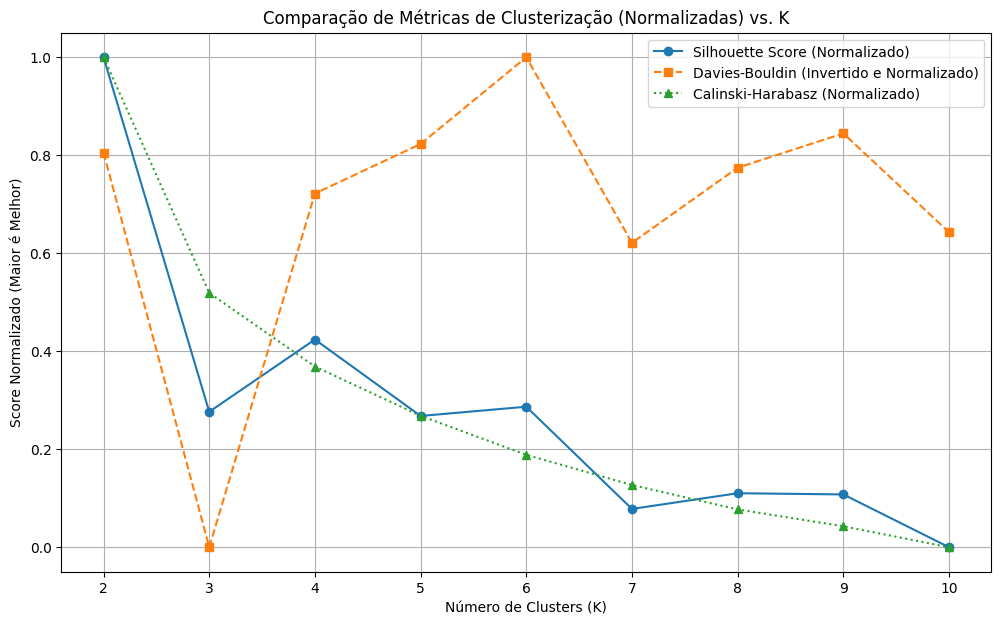

In [15]:
# --- Plot comparativo de múltiplos índices para diferentes K's ---
# Transforma os scores para uma escala [0, 1] para visualização no mesmo gráfico.
# Para Davies-Bouldin, invertemos o score (1 - norm_score) pois valores menores são melhores.

scaler_mm = MinMaxScaler() # Usaremos o mesmo scaler para todos

# Silhueta (Maior é melhor)
norm_sil = scaler_mm.fit_transform(np.array(silhouette_scores).reshape(-1, 1)).flatten()

# Davies-Bouldin (Menor é melhor -> Inverter após normalizar)
norm_db_temp = scaler_mm.fit_transform(np.array(db_scores).reshape(-1, 1)).flatten()
norm_db_inverted = 1 - norm_db_temp # Agora maior é melhor

# Calinski-Harabasz (Maior é melhor)
# Cuidado: CH pode ter valores muito grandes, a normalização pode achatar outras curvas.
# Vamos normalizar, mas ter isso em mente.
norm_ch = scaler_mm.fit_transform(np.array(ch_scores).reshape(-1, 1)).flatten()


# --- Plot Comparativo dos Scores Normalizados ---
plt.figure(figsize=(12, 7))

plt.plot(k_range, norm_sil, marker='o', linestyle='-', label='Silhouette Score (Normalizado)')
plt.plot(k_range, norm_db_inverted, marker='s', linestyle='--', label='Davies-Bouldin (Invertido e Normalizado)')
plt.plot(k_range, norm_ch, marker='^', linestyle=':', label='Calinski-Harabasz (Normalizado)')

plt.title('Comparação de Métricas de Clusterização (Normalizadas) vs. K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Score Normalizado (Maior é Melhor)')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05) # Garante que a escala vá de 0 a 1 no eixo Y
plt.show()

In [16]:
# --- Escolha automatizada de K ---
# A escolha agora pode ser baseada em um consenso ou pico claro em múltiplas métricas.
# Muitas vezes, diferentes métricas sugerem K's diferentes. É comum analisar
# os picos/cotovelos e também considerar a interpretabilidade dos clusters.

optimal_k_sil = k_range[np.argmax(silhouette_scores)]
optimal_k_db = k_range[np.argmin(db_scores)] # Argmin para o DB original
optimal_k_ch = k_range[np.argmax(ch_scores)]

print(f"\nK Ótimo sugerido por Silhueta: {optimal_k_sil} (Score: {max(silhouette_scores):.4f})")
print(f"K Ótimo sugerido por Davies-Bouldin: {optimal_k_db} (Score: {min(db_scores):.4f})")
print(f"K Ótimo sugerido por Calinski-Harabasz: {optimal_k_ch} (Score: {max(ch_scores):.1f})")

# Decisão: Vamos continuar usando o K da Silhueta como fizemos antes,
# mas agora temos mais informação para justificar ou questionar essa escolha.
# Em um cenário real, você analisaria o gráfico e os scores para tomar a decisão final.
# Para este dataset, é comum que K=2 ou K=3 sejam apontados.
optimal_k = optimal_k_sil
print(f"\n--> Escolhendo K = {optimal_k} (baseado na Silhueta) para prosseguir.")


K Ótimo sugerido por Silhueta: 2 (Score: 0.2144)
K Ótimo sugerido por Davies-Bouldin: 6 (Score: 1.6954)
K Ótimo sugerido por Calinski-Harabasz: 2 (Score: 1303.6)

--> Escolhendo K = 2 (baseado na Silhueta) para prosseguir.


##### D.2 - Análise de Silhueta Score por Amostra para seleção de K

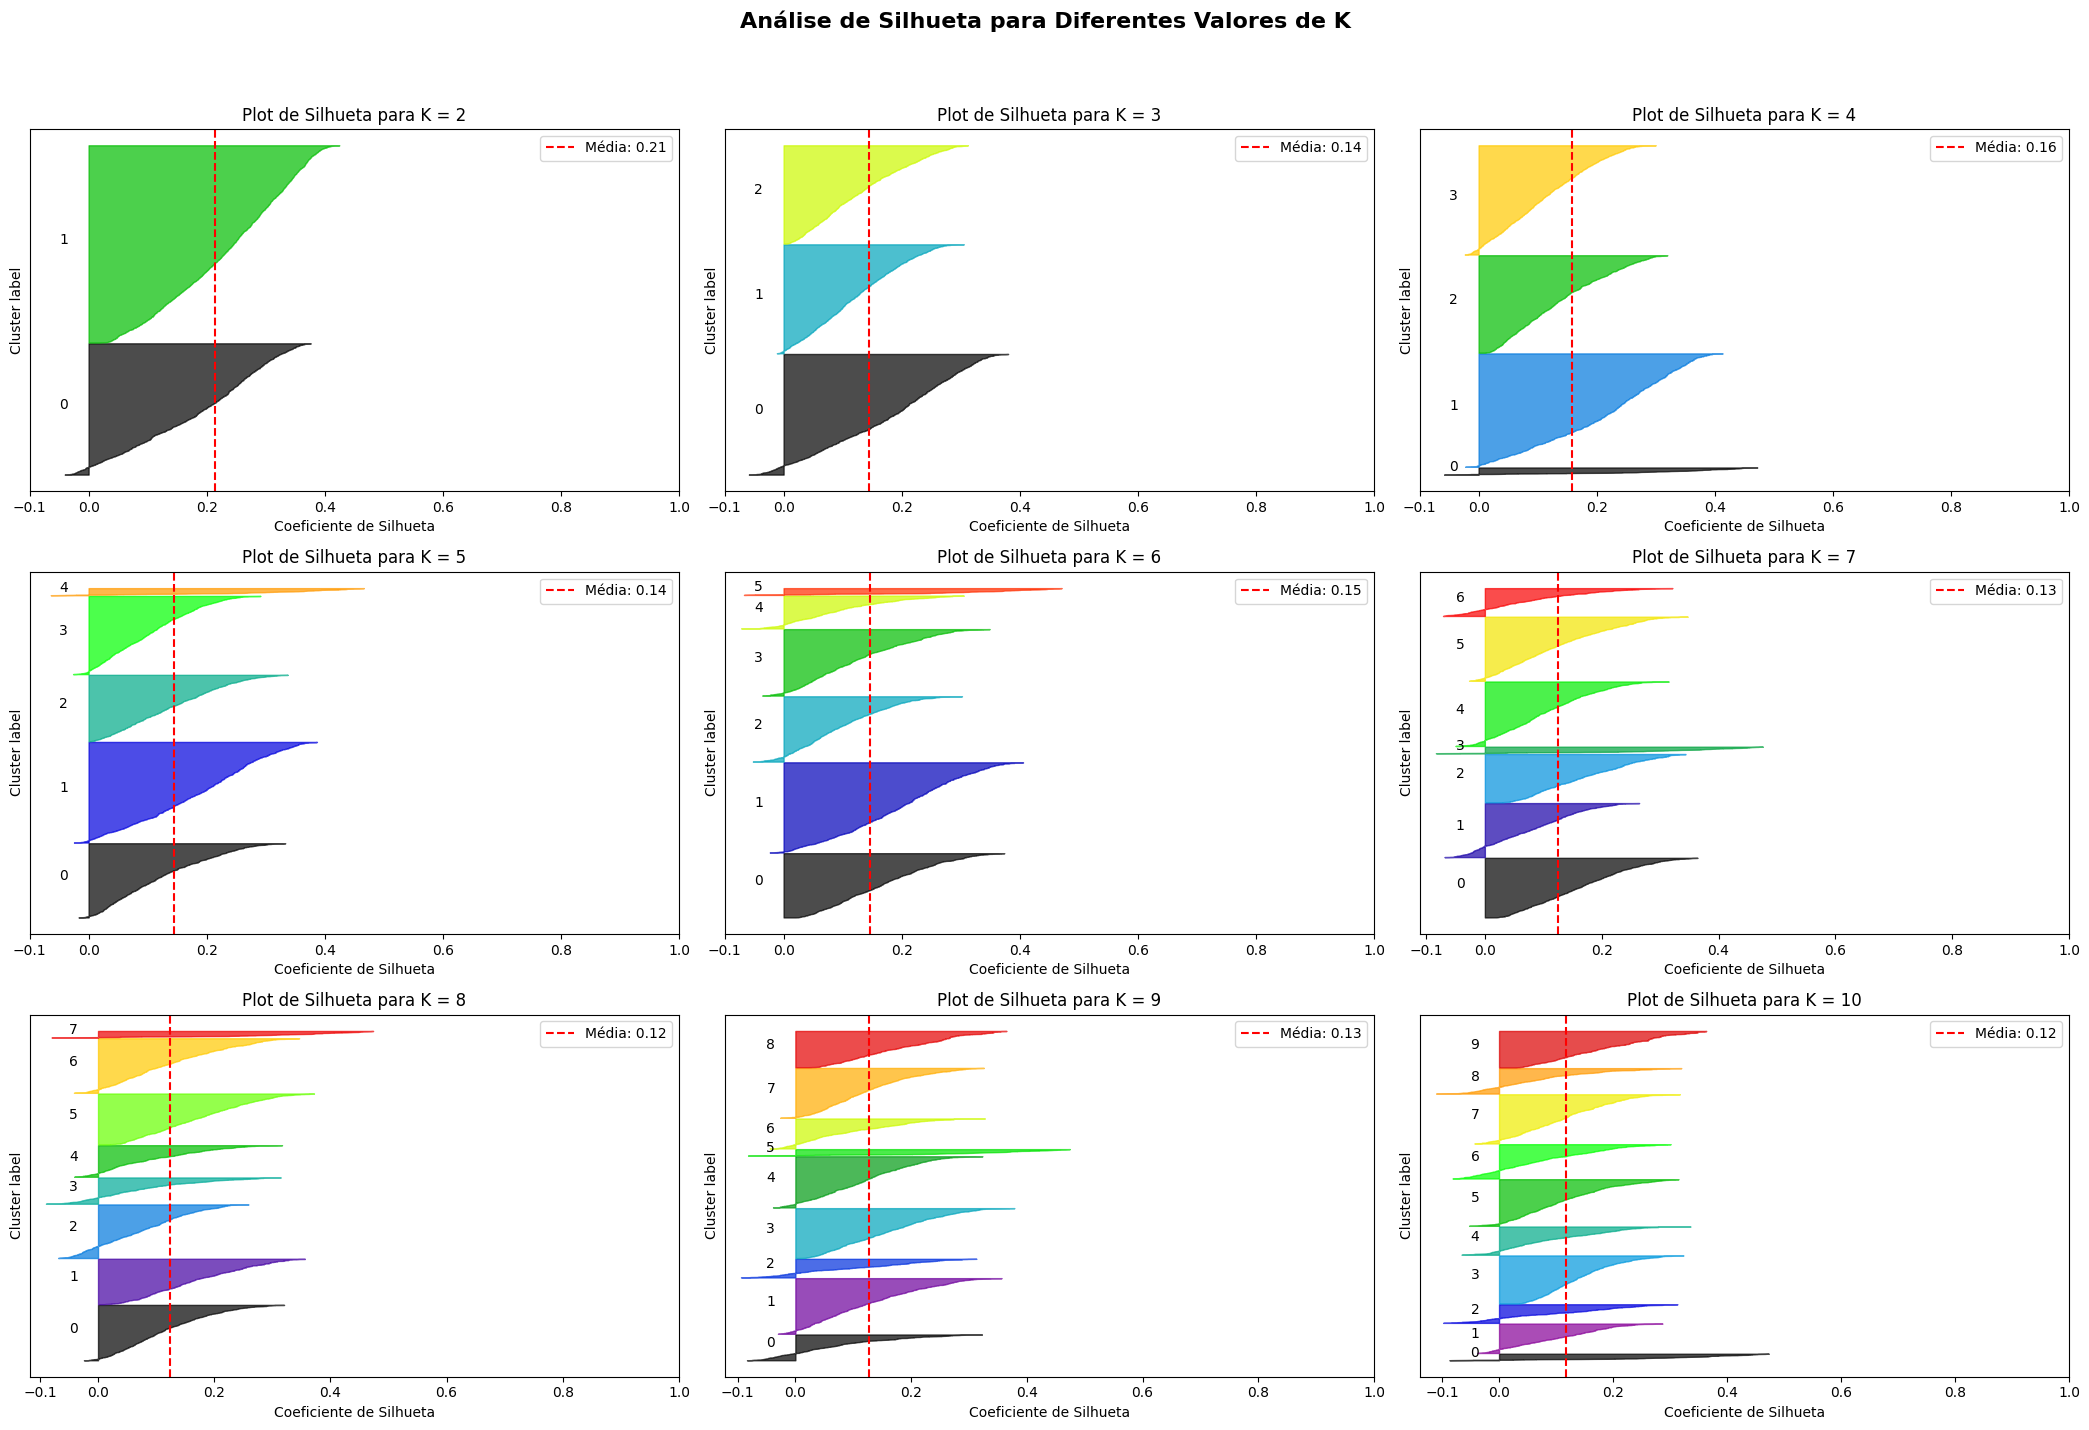

In [19]:
# --- Análise e Validação com Plots de Silhueta por Amostra (em Grade) ---
k_range = range(2, 11) # Testar K de 2 a 10
average_silhouette_scores = []

# --- Configuração da Grade de Plots de Silhueta ---
n_cols = 3
n_rows = math.ceil(len(k_range) / n_cols)
fig_sil, axes_sil = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 5)) # Ajuste figsize conforme necessário
axes_sil = axes_sil.flatten() # Transforma a matriz de eixos em um array 1D para facilitar a iteração

for idx, k in enumerate(k_range):
    ax = axes_sil[idx] # Seleciona o eixo correto na grade

    # --- Criação dos Clusters para o K atual ---
    kmeans_temp = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=1000,
        max_iter=300,
        random_state=42
    )
    labels_temp = kmeans_temp.fit_predict(X_scaled)

    # --- Cálculo dos Scores de Silhueta ---
    silhouette_avg = silhouette_score(X_scaled, labels_temp)
    sample_silhouette_values = silhouette_samples(X_scaled, labels_temp)
    average_silhouette_scores.append(silhouette_avg)

    # --- Plot da Silhueta no Eixo Atual (ax) ---
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels_temp == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"Plot de Silhueta para K = {k}")
    ax.set_xlabel("Coeficiente de Silhueta")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Média: {silhouette_avg:.2f}')
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.legend(loc='best')

# Ocultar eixos não utilizados na grade de silhueta
for i in range(len(k_range), n_rows * n_cols):
    fig_sil.delaxes(axes_sil[i])

fig_sil.suptitle("Análise de Silhueta para Diferentes Valores de K", fontsize=16, fontweight='bold')
fig_sil.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta layout para não sobrepor títulos
plt.show()


#### (E) Aplicação da clusterização

In [57]:
# --- 5. Criação dos clusters ---

print(f"\nCriando clusters finais com K={optimal_k}...")
kmeans = KMeans(
    n_clusters=optimal_k,
    init='k-means++',
    n_init=1000,        # Recomendado >= 10
    max_iter=300,
    random_state=42
)

# Treinar o modelo e obter os labels
labels = kmeans.fit_predict(X_scaled)

# Adicionar os labels ao DataFrame original para análise
df['cluster'] = labels
print(f"\nLabels dos clusters adicionados ao DataFrame (primeiras linhas):")
display(df.head())
print(f"\nDistribuição dos vinhos por cluster:\n")
display(df['cluster'].value_counts().sort_index())

# Obter os centroides (no espaço escalado)
centroids_scaled = kmeans.cluster_centers_


Criando clusters finais com K=2...

Labels dos clusters adicionados ao DataFrame (primeiras linhas):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1



Distribuição dos vinhos por cluster:



,count
cluster,
0,2941
1,1957


#### (F) Validação dos resultados

##### F.1 - Análise com Gráfico de Radar


Gerando Radar Plots individuais (K=2) em grade (dados escalados)...



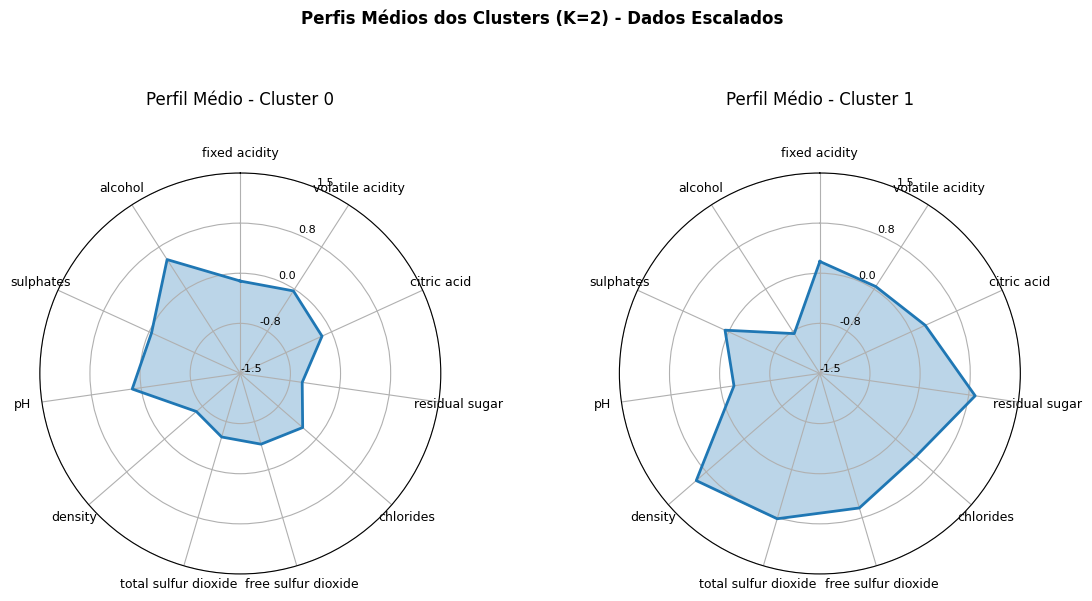

In [68]:
# --- 6.1 Validação e Perfis dos Clusters (Radar Plots em Grade) ---

# Para visualização em Radar Plot, é melhor usar os dados escalados
# ou normalizar as médias originais para uma escala comparável (ex: 0 a 1),
# pois no gráfico de radar, variáveis com ranges muito distintos são difíceis de análisar
# Vamos usar os centroides escalados que já temos.
centroid_df_scaled = pd.DataFrame(centroids_scaled, columns=features)

# Mas para o caso onde deseja-se utilizar as features em suas escalas naturais, segue:
# Calcular a média das features (na escala original) para cada cluster
cluster_profiles_original = df.groupby('cluster')[features].mean()

# --- Configuração da Grade de Plots de Radar ---
n_clusters = optimal_k
n_cols_radar = 3
n_rows_radar = math.ceil(n_clusters / n_cols_radar)
fig_radar, axes_radar = plt.subplots(n_rows_radar, n_cols_radar,
                                     figsize=(n_cols_radar * 6, n_rows_radar * 6), # Ajuste figsize
                                     subplot_kw=dict(polar=True)) # IMPORTANTE: Cria eixos polares
axes_radar = axes_radar.flatten() # Transforma em array 1D

# Preparar ângulos e categorias (são os mesmos para todos os plots de radar)
categories = list(features)
n_cat = len(categories)
angles = [n / float(n_cat) * 2 * np.pi for n in range(n_cat)]
angles += angles[:1] # Fechar o círculo

# Determinar limites Y globais para comparação visual

min_val_global = np.floor(centroid_df_scaled.min().min()) - 0.5 # dados escalados
max_val_global = np.ceil(centroid_df_scaled.max().max()) + 0.5 # dados escalados

# min_val_global = np.floor(cluster_profiles_original.min().min()) - 0.5 # dados originais
# max_val_global = np.ceil(cluster_profiles_original.max().max()) + 0.5 # dados originais

y_ticks = np.linspace(min_val_global, max_val_global, 5) # 5 ticks radiais
y_tick_labels = [f"{val:.1f}" for val in y_ticks]

# Gerar um Radar Plot para cada cluster na grade
for i in range(n_clusters):
    ax = axes_radar[i] # Seleciona o eixo polar correto

    cluster_data = centroid_df_scaled.iloc[i] # Pega a linha do centroide do cluster i (dados escalados)

    # cluster_data = cluster_profiles_original.iloc[i] # Pega a linha do centroide do cluster i (dados originais)

    # Plotar os dados do cluster específico
    values = cluster_data.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f"Cluster {i}")
    ax.fill(angles, values, alpha=0.3)

    # Configurações do plot (aplicadas a cada eixo `ax`)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1]) # Define posições dos ticks
    ax.set_xticklabels(categories, size=9) # Define labels dos ticks

    # Usar limites e ticks Y globais
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_tick_labels, size=8)
    ax.set_ylim(min_val_global, max_val_global)

    ax.set_title(f"Perfil Médio - Cluster {i}", size=12, y=1.15) # Ajuste y para espaçamento

# Ocultar eixos não utilizados na grade de radar
for i in range(n_clusters, n_rows_radar * n_cols_radar):
    # fig_radar.delaxes(axes_radar[i]) # delaxes não funciona bem com polar=True às vezes
    axes_radar[i].set_visible(False) # Alternativa mais segura

fig_radar.suptitle(f"Perfis Médios dos Clusters (K={optimal_k}) - Dados Escalados", fontsize=12, fontweight='bold', ha='left', va='center')
fig_radar.tight_layout(rect=[0.31, 0.03, 1.25, 0.9]) # Ajusta layout e deixa espaço para suptitle
plt.show()

> O Radar Plot ajuda a visualizar e interpretar as características médias de cada cluster. Veja quais features têm valores altos ou baixos para cada cluster, buscando diferenças significativas que definam cada grupo.

##### F.2 - Análise com Gráfico de Coordenadas Paralelas

In [83]:
# --- 6.1 Perfis dos Clusters (Coordenadas Paralelas - Plotly GO - Dados Originais) ---

import plotly.express as px # Importar Plotly Express
import plotly.graph_objects as go # Importar para layout se necessário

# Calcular a média das features originais para cada cluster
cluster_profiles_original = df.groupby('cluster')[features].mean()

# Preparar DataFrame - Manter 'cluster' como NUMÉRICO para mapeamento na colorscale
cluster_profiles_plot_df_go = cluster_profiles_original.reset_index()
# cluster_profiles_plot_df_go['cluster'] = cluster_profiles_plot_df_go['cluster'] # Já deve ser numérico

# --- Construção com plotly.graph_objects ---

# 1. Definir as dimensões para o gráfico Parcoords
dimensions = []
for col in features:
    dimensions.append(dict(
        range = [df[col].min(), df[col].max()], # Define a escala do eixo com base nos dados originais totais
        label = col.replace('_', ' ').title(),   # Nome amigável para o eixo
        values = cluster_profiles_plot_df_go[col] # Valores médios para esta dimensão
    ))

# 2. Criar a 'trace' Parcoords
parcoords_trace = go.Parcoords(
    line = dict(
        color = cluster_profiles_plot_df_go['cluster'], # Usar a coluna numérica 'cluster'
        # Escolher uma colorscale. Para cores distintas, podemos usar uma qualitativa.
        # Plotly mapeará os números 0, 1, ... para cores nesta escala.
        colorscale = px.colors.qualitative.Plotly, # Usando a paleta padrão do Plotly para cores distintas
        # Se você preferir Viridis (embora seja sequencial, pode funcionar visualmente para poucos clusters):
        # colorscale = 'Viridis',
        showscale = False # Ocultar a barra de escala de cores, já que estamos usando IDs discretos
        ),
    dimensions = dimensions
)

# 3. Criar a Figura e adicionar a trace
fig_parcoords = go.Figure(data=[parcoords_trace])

# 4. Atualizar o Layout (Título, etc.)
fig_parcoords.update_layout(
    title=f'Coordenadas Paralelas dos Perfis Médios dos Clusters (K={optimal_k}) - Dados Originais (Plotly GO)'
)

# 5. Exibir o gráfico
fig_parcoords.show()


# O restante do código (Radar plots etc.) continua igual...

### **4. Quais suas vantagens e limitações? (Vantagens vs Limitações & Precauções)**



*   **Vantagens:**
  *   **Simplicidade e Intuitividade:** Fácil de entender e implementar.
  *   **Eficiência Computacional:** Relativamente rápido para grandes conjuntos de dados, com **complexidade aproximadamente linear** no número de pontos, número de clusters e número de dimensões por iteração ($O(n\cdot k \cdot d \cdot i)$, onde $i$ é o número de iterações).
  *   **Escalabilidade:** Funciona bem para um número moderado de dimensões e grande número de amostras (especialmente com `n_init=1`$^1$ ou usando MiniBatchKMeans$^2$).
  *   **Convergência Garantida:** O algoritmo sempre converge (embora possa ser para um ótimo local).
  *   **Bom Ponto de Partida:** Frequentemente usado como baseline ou passo inicial em pipelines de análise de dados mais complexos.

  $^1$`n_init` especifica o número de vezes que o algoritmo K-Means será executado com diferentes sementes (seeds) para os centroides iniciais. O resultado final retornado será o da execução que produziu a menor inércia (WCSS - Within-Cluster Sum of Squares). A principal implicação negativa de `n_init = 1` é que o K-Means é muito sensível à posição inicial dos centroides, executar o algoritmo apenas uma vez significa que o resultado final depende inteiramente da sorte dessa única inicialização. A principal vantagen é a velocidade de execução, embora seja uma prática pouco recomendada na prática.

  $^2$MiniBatchKMeans é uma variante otimizada do algoritmo K-Means padrão, projetada especificamente para lidar com grandes conjuntos de dados de forma mais eficiente em termos de tempo de computação e uso de memória. Enquanto o k-means padrão (algoritimo de Lloyd) requer que todo o conjunto de dados seja carregado na memória, o `MiniBatchKMeans` aborda essa limitação usando mini-lotes (mini-batches) – pequenos subconjuntos aleatórios do conjunto de dados – em cada iteração.

*   **Limitações:**
  *   **Sensibilidade à Inicialização:** Resultados podem variar significativamente dependendo dos centroides iniciais, podendo ficar preso em ótimos locais ruins. (Mitigado por K-Means++ e `n_init > 1`).
  *   **Necessidade de Especificar *k*:** O número de clusters deve ser definido a priori, o que nem sempre é trivial ou conhecido. A escolha errada de *k* leva a resultados ruins.
  *   **Sensibilidade a Outliers:** Como os centroides são baseados em médias, outliers podem distorcer significativamente sua posição e, consequentemente, os limites dos clusters.
  *   **Assume Clusters Esféricos/Isotrópicos:** Tem dificuldade com clusters de formas não convexas (alongados, em forma de anel, etc.) ou com densidades e variâncias muito diferentes.
  *   **Maldição da Dimensionalidade:** Em espaços de alta dimensionalidade, o conceito de distância Euclidiana torna-se menos significativo (pontos tendem a ficar equidistantemente distantes), prejudicando a performance do K-Means.
  *   **Atribuição Rígida (*Hard Clustering*):** Não captura incertezas ou sobreposições entre clusters. Isto é, não existe uma probabilidade associada a cada ponto pertencer aos diferentes clusters formados e portanto, sempre um ponto de dados é atribuído a petencer a um único cluster.

*   **Precauções (Como lidar com as limitações):**
  *   **Escalonamento/Normalização de Features:** *Essencial*. Use `StandardScaler` (média 0, desvio padrão 1), `MinMaxScaler` (intervalo [0, 1]), [entre outras](https://www.datacamp.com/tutorial/normalization-in-machine-learning)... antes de aplicar K-Means.
  *   **Escolha Cuidadosa de *k*:** Use métodos como o Cotovelo (baseado na inércia), Silhueta ou Gap Statistic, combinados com conhecimento de domínio. Experimente diferentes valores de *k*.
  *   **Múltiplas Inicializações (`n_init`):** Sempre use `n_init` com valor maior que 1 (e.g., 10 ou mais) para aumentar a chance de encontrar um bom ótimo local (ou o global). Use `init='k-means++'`.
  *   **Tratamento de Outliers:** Considere detectar e remover outliers antes do agrupamento ou usar algoritmos mais robustos (como **K-Medoids**, que usa medianas em vez de médias).
  *   **Redução de Dimensionalidade:** Aplique técnicas como PCA, t-SNE ou UMAP *antes* do K-Means se estiver lidando com muitas dimensões. Isso pode melhorar a performance e a visualização.
  *   **Avaliar os Pressupostos:** Visualize seus dados (se possível) para **verificar se os pressupostos de esfericidade e variância similar são razoáveis**. Se não forem, considere outros algoritmos (DBSCAN, GMM, Spectral Clustering).


### **5. Como avaliar sua performance? (Mensuração dos resultados)**

A avaliação de algoritmos de clusterização é intrinsecamente mais difícil do que a classificação supervisionada, pois geralmente não há "rótulos verdadeiros". As métricas são divididas em internas e externas:

*   **Métricas Internas (Não requerem rótulos verdadeiros):** Avaliam a qualidade da estrutura de um cluster com base nos próprios dados.
    *   **Inércia (WCSS):** `kmeans.inertia_` em scikit-learn. Mede a compactação dos clusters. *Problema:* Tende a diminuir monotonicamente à medida que *k* aumenta (ter *n* clusters para *n* pontos resulta em inércia 0). Útil principalmente no Método do Cotovelo para *sugerir* um *k*, mas não para comparar a qualidade absoluta entre diferentes *k*.

*   **Métricas Relativas (Não requerem rótulos verdadeiros):** Avaliam a qualidade da estrutura de um cluster com base nos próprios dados e de clusters vizinhos.
    *   **Score de Silhueta (Silhouette Score):** `sklearn.metrics.silhouette_score`. Mede quão similar um ponto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). Varia de -1 a 1.
        *   `+1`: Ponto está longe dos clusters vizinhos (ótimo).
        *   `0`: Ponto está muito próximo ou sobre o limite de decisão entre dois clusters.
        *   `-1`: Ponto provavelmente foi atribuído ao cluster errado.
        
      O score médio da silhueta para todos os pontos é uma boa medida da adequação geral do número de clusters *k*. Valores mais altos indicam clusters mais bem definidos. É geralmente preferível à Inércia para escolher *k*.
    *   **Índice Davies-Bouldin (Davies-Bouldin Index):** `sklearn.metrics.davies_bouldin_score`. Mede a similaridade média entre cada cluster e seu cluster mais similar. Baseia-se na razão entre a dispersão dentro do cluster e a separação entre clusters. *Valores mais baixos indicam melhor partição* (clusters mais compactos e bem separados). Tende a dar bons resultados para clusters convexos.

*   **Métricas Externas (Requerem rótulos verdadeiros - úteis para benchmarking ou quando se tem alguma forma de ground truth):** Comparam os clusters encontrados com uma classificação de referência.
    *   **Índice Rand Ajustado (Adjusted Rand Index - ARI):** `sklearn.metrics.adjusted_rand_score`. Mede a similaridade entre duas partições (a encontrada e a verdadeira), corrigindo para a chance. Varia de -1 a 1 (tipicamente 0 a 1), onde 1 é uma correspondência perfeita e valores próximos a 0 indicam atribuição aleatória.
    *   **Informação Mútua Normalizada (Normalized Mutual Information - NMI):** `sklearn.metrics.normalized_mutual_info_score`. Mede o acordo entre as duas partições usando conceitos da teoria da informação. Varia de 0 a 1.
    *   **Homogeneidade, Completude e V-Measure:** `sklearn.metrics.homogeneity_completeness_v_measure`. Métricas baseadas em entropia condicional.
        *   *Homogeneidade:* Cada cluster contém apenas membros de uma única classe verdadeira.
        *   *Completude:* Todos os membros de uma dada classe verdadeira são atribuídos ao mesmo cluster.
        *   *V-Measure:* A média harmônica entre homogeneidade e completude.

### **6. Quais as principais dicas práticas que "mudam o jogo" em situações reais? (Hacks & Dicas)**

1.  **SEMPRE Escalone/Normalize seus Dados:** Este é o passo nº 1 e não opcional para K-Means. A diferença de escala entre features pode fazer com que features com maiores magnitudes dominem completamente o cálculo da distância. `StandardScaler` é o mais comum.
2.  **Use `init='k-means++'` e `n_init >= 10`:** Nunca confie em uma única execução com inicialização aleatória simples. K-Means++ melhora drasticamente a qualidade da inicialização, e rodar múltiplas vezes (`n_init`) com sementes diferentes e escolher o melhor resultado (menor inércia) é crucial para evitar ótimos locais ruins.
3.  **Não Confie Cegamente no Método do Cotovelo:** A "curva do cotovelo" para a inércia é frequentemente ambígua. O **Score de Silhueta** geralmente fornece uma indicação mais clara do *k* ótimo, pois considera tanto a coesão quanto a separação. Combine com o **Índice Davies-Bouldin** e, mais importante, com o **conhecimento do domínio**.
4.  **Explore Resultados com PCA/t-SNE/UMAP:** Mesmo que você execute K-Means nas features originais (escaladas), usar técnicas de redução de dimensionalidade *depois* do agrupamento para visualizar os resultados em 2D ou 3D (colorindo os pontos pelos labels do K-Means) pode fornecer insights valiosos sobre a separação e a forma dos clusters. Às vezes, aplicar PCA *antes* do K-Means também ajuda a remover ruído e pode melhorar os clusters.
5.  **Analise os Centroides:** Os centroides (`kmeans.cluster_centers_`) são a "essência" de cada cluster. Inverta o escalonamento (`scaler.inverse_transform(centroids)`) para interpretá-los na escala original. Analise os valores médios das features para cada cluster. Isso ajuda a criar "personas" ou perfis para cada grupo (ex: "Cluster A: clientes de alta renda, baixa frequência", "Cluster B: clientes jovens, alto engajamento digital").
6.  **Considere Variantes do K-Means:**
    *   **K-Medoids (PAM - Partitioning Around Medoids):** Usa pontos de dados reais como centroides (medoids) em vez da média. É mais robusto a outliers, mas computacionalmente mais caro.
    *   **Mini-Batch K-Means:** `sklearn.cluster.MiniBatchKMeans`. Usa subconjuntos aleatórios (mini-batches) dos dados em cada iteração. Muito mais rápido e escalável para datasets massivos que não cabem na memória, ao custo de uma possível pequena perda na qualidade dos clusters em comparação com o K-Means padrão.
7.  **Combine com Conhecimento de Domínio:** Nenhuma métrica substitui a interpretação no contexto do problema. Os clusters fazem sentido? Eles representam segmentos de negócios acionáveis? A validação final muitas vezes vem da utilidade prática dos grupos encontrados.
8.  **Saiba Quando K-Means NÃO é a Melhor Escolha:** Se você suspeita ou visualiza que seus clusters têm formas complexas (não esféricas), densidades muito variáveis, ou se há muito ruído/outliers, K-Means provavelmente não dará bons resultados. Explore alternativas:
    *   **DBSCAN:** Baseado em densidade, ótimo para formas arbitrárias e robusto a outliers (não requer especificar *k*, mas sim `eps` e `min_samples`).
    *   **Gaussian Mixture Models (GMM):** Modelo probabilístico (soft assignment) que assume que os clusters são gerados a partir de distribuições Gaussianas (permite clusters elipsoidais).
    *   **Spectral Clustering:** Usa o espectro (eigenvalues) da matriz de similaridade dos dados para realizar redução de dimensionalidade antes de agrupar em dimensões inferiores. Bom para formas complexas.
    *   **Agglomerative Clustering (Hierárquico):** Constrói uma hierarquia de clusters, útil quando a estrutura hierárquica é relevante.

Dominar o K-Means envolve não apenas saber como executá-lo, mas entender profundamente seus pressupostos, limitações e como mitigar seus pontos fracos através de pré-processamento adequado, escolha de parâmetros e avaliação criteriosa dos resultados.

### **Apêndice**

#### **1 - O método de inicialização K-Means++**

**O Problema da Inicialização Aleatória Simples**

Antes de explicar o K-Means++, lembre-se do problema da inicialização aleatória simples (onde apenas selecionamos *k* pontos aleatórios do dataset como centroides iniciais):

1.  **Sensibilidade Extrema:** O K-Means padrão (algoritmo de Lloyd) é muito sensível aos centroides iniciais.
2.  **Risco de Ótimos Locais Ruins:** Uma inicialização ruim (ex: dois centroides começando muito próximos dentro do mesmo cluster denso, ou um centroide começando em uma área muito esparsa) pode levar o algoritmo a convergir rapidamente para um mínimo local muito ruim (alta inércia, clusters mal formados).
3.  **Inconsistência:** Executar o K-Means com inicialização aleatória várias vezes pode produzir resultados de agrupamento muito diferentes e de qualidade variável.

**Como o K-Means++ Funciona (A Ideia Central)**

O K-Means++ aborda esse problema com uma estratégia de inicialização mais inteligente e probabilística, projetada para **escolher centroides iniciais que já estão bem espaçados entre si**. A intuição é que, se os centroides iniciais já estiverem distribuídos pelo espaço de dados, eles têm uma chance maior de estarem próximos aos centros dos clusters "verdadeiros", levando a uma convergência melhor e mais rápida.

**O Algoritmo K-Means++:**

1.  **Primeiro Centroide:** Escolha o primeiro centroide (`c_1`) uniformemente ao acaso dentre todos os pontos de dados.
2.  **Escolha dos Centroides Subsequentes (Iterativo):** Para cada centroide subsequente (`c_2` até `c_k`):
    *   **Calcule Distâncias:** Para cada ponto de dado `x` que *ainda não foi escolhido* como centroide, calcule a distância quadrada entre `x` e o centroide *mais próximo* que já foi escolhido. Vamos chamar essa distância de `D(x)²`. (Ou seja, `D(x)² = min ||x - c_i||²` sobre todos os `c_i` já escolhidos).
    *   **Seleção Probabilística:** Escolha o *próximo* centroide (`c_{novo}`) dentre os pontos de dados restantes. A probabilidade de um ponto `x` ser escolhido como `c_{novo}` é **proporcional a D(x)²**.
        *   `P(x ser escolhido) = D(x)² / Σ D(y)²` (onde a soma é sobre todos os pontos `y` ainda não escolhidos).
    *   **Repita:** Continue este processo até que *k* centroides tenham sido selecionados.
3.  **Proceda com K-Means Padrão:** Use esses *k* centroides selecionados pelo K-Means++ como os pontos de partida para o algoritmo K-Means padrão (iterações de atribuição e atualização).

**Por que Isso Leva a Resultados Melhores? (Mecanismo)**

*   **Espalhamento Inteligente:** A chave é a seleção probabilística ponderada por `D(x)²`. Pontos que estão *longe* de todos os centroides já escolhidos terão um `D(x)²` alto e, portanto, uma probabilidade muito maior de serem selecionados como o próximo centroide. Isso força o algoritmo a escolher centroides em regiões do espaço de dados que ainda não estão "cobertas" por um centroide próximo.
*   **Redução de Más Inicializações:** Diminui drasticamente a chance de iniciar com múltiplos centroides agrupados na mesma área densa, que é uma causa comum de convergência para ótimos locais ruins na inicialização aleatória simples.
*   **Melhor Ponto de Partida:** Ao fornecer um conjunto inicial de centroides mais representativo e bem distribuído, o K-Means++ dá ao algoritmo de Lloyd uma "vantagem", tornando mais provável que ele encontre um mínimo local de baixa inércia (mais próximo do ótimo global).

**Vantagens do K-Means++:**

1.  **Melhor Qualidade de Cluster (Menor Inércia):** Consistentemente, em média, leva a uma inércia final (WCSS) significativamente menor em comparação com a inicialização aleatória simples. Aumenta a probabilidade de encontrar uma solução de agrupamento de alta qualidade.
2.  **Convergência Mais Rápida (Menos Iterações K-Means):** Embora a própria inicialização K-Means++ seja um pouco mais custosa, o número de iterações do K-Means padrão necessárias para convergir após essa inicialização é geralmente menor.
3.  **Maior Robustez e Consistência:** Os resultados tendem a ser mais estáveis e menos dependentes da aleatoriedade da primeira escolha de centroide em comparação com a inicialização totalmente aleatória. Quando combinado com `n_init > 1`, reforça ainda mais a chance de encontrar um bom resultado consistentemente.
4.  **Garantias Teóricas:** Ao contrário da inicialização aleatória, K-Means++ vem com garantias teóricas (provado por Arthur e Vassilvitskii em 2007) de que a solução K-Means resultante está, em expectativa, dentro de um fator logarítmico (`O(log k)`) da solução K-Means ótima.

**Desvantagens do K-Means++:**

1.  **Custo de Inicialização Ligeiramente Maior:** O processo de seleção dos *k* centroides no K-Means++ requer o cálculo de distâncias de todos os pontos aos centroides já selecionados em cada etapa (k-1 passagens sobre os dados). Isso é computacionalmente mais caro do que simplesmente escolher *k* pontos aleatórios. No entanto, esse custo extra na inicialização é frequentemente compensado (ou mais do que compensado) pela convergência mais rápida nas iterações principais do K-Means.
2.  **Ainda não Garante o Ótimo Global:** K-Means++ melhora drasticamente a *inicialização*, mas o algoritmo de Lloyd subsequente ainda é um algoritmo de otimização local e pode ficar preso em um mínimo local. K-Means++ aumenta a chance de encontrar um *bom* mínimo local, mas não garante o *melhor possível* (global). É por isso que ainda é recomendado usar `n_init` com um valor maior que 1 (por exemplo, 10) mesmo ao usar `init='k-means++'`.

**Conclusão:**

K-Means++ é uma melhoria substancial sobre a inicialização aleatória. Ao escolher centroides iniciais de forma mais inteligente e espaçada, ele leva a resultados de agrupamento de maior qualidade (menor inércia), convergência mais rápida e maior robustez, tornando-se a escolha padrão e recomendada (`init='k-means++'` no scikit-learn) para inicializar o algoritmo K-Means na prática.

#### **2 - Como verificar qual método de agrupamento é adequado ao conjunto de dados?**

Para verificar se o K-means é adequado para seu conjunto de dados, você pode realizar as seguintes análises e testes:

##### 1. Análise da Estrutura dos Dados

**Visualização de Dados:**
- **PCA/t-SNE/UMAP**: Reduza a dimensionalidade para 2D ou 3D e visualize a estrutura dos dados
- **Matriz de dispersão**: Observe o padrão de relacionamento entre variáveis
- **Dendrogramas**: Use clustering hierárquico para ver se há estrutura natural de grupos

**Testes de Esfericidade:**
- **Teste de Hopkins**: Mede a tendência à clusterização; valores próximos a 0,5 indicam distribuição uniforme (sem clusters naturais)
- **Estatística de Mardia**: Para verificar normalidade multivariada (pressuposto para clusters esféricos)

##### 2. Análise de Densidade

**Verificação de Homogeneidade:**
- **Estimativa de densidade por kernel (KDE)**: Identifica regiões de densidade variável
- **DBSCAN exploratório**: Execute com diferentes parâmetros para detectar clusters de densidade variável
- **Histogramas locais**: Analise a distribuição de pontos em diferentes regiões

**Detecção de Outliers:**
- **Distância de Mahalanobis**: Identifica outliers multivariados
- **Isolation Forest**: Detecta anomalias que podem distorcer clusters de K-means

##### 3. Comparação de Algoritmos

**Experimentos Comparativos:**
- Compare K-means com algoritmos como:
  - DBSCAN (bom para clusters de densidade variável)
  - Clustering hierárquico (flexível para formas diversas)
  - Gaussian Mixture Models (para clusters elípticos)
  - Spectral Clustering (para formas arbitrárias)

**Métricas de Validação:**
- **Silhouette Score**: Valores baixos indicam que K-means pode não ser adequado
- **Calinski-Harabasz Index**: Compara variância entre clusters e dentro deles
- **Davies-Bouldin Index**: Baixos valores indicam clusters bem separados
- **Compare as métricas entre diferentes algoritmos**

##### 4. Testes Específicos para Pressupostos do K-means

**Teste de Isotropia:**
- **Teste de Chi-quadrado para isotropia**: Verifica se a variância é igual em todas as direções

**Linearidade de Fronteiras:**
- **Análise discriminante quadrática (QDA) vs. linear (LDA)**: Se QDA for significativamente melhor, fronteiras não são lineares

**Homogeneidade de Tamanho dos Clusters:**
- **VAT (Visual Assessment of Tendency)**: Matriz de distância reordenada que mostra padrões de cluster
- **Análise da distribuição de tamanho dos clusters**: Detecta desequilíbrios significativos

##### 5. Testes Estatísticos de Ajuste

**Bootstrap e Validação Cruzada:**
- **Bootstrap de estabilidade**: Execute K-means múltiplas vezes com subamostras para verificar estabilidade dos centroides
- **Gap statistic**: Compara dispersão intra-cluster com dados gerados aleatoriamente

**Análise de Resíduos:**
- **Dispersão intra-cluster**: Alta dispersão em alguns clusters sugere não-esfericidade

##### Exemplo de Fluxo de Decisão

1. Inicie com visualização e redução de dimensionalidade
2. Calcule Hopkins statistic - se < 0,25 ou > 0,75, dados têm estrutura não aleatória
3. Compare clustering exploratório usando K-means, DBSCAN e hierárquico
4. Avalie métricas de validação para cada abordagem
5. Examine VAT plot para estrutura natural de clusters
6. Use Gap statistic para determinar o número ideal de clusters

Se após essas análises você observar clusters de formatos irregulares, densidades variáveis, outliers significativos ou fronteiras não-lineares, considere alternativas ao K-means como DBSCAN, clustering espectral ou métodos baseados em densidade.

#### **3 - Visual Assessment of Tendency (VAT) e Improved VAT (iVAT)**

VAT e iVAT são técnicas poderosas de visualização para análise exploratória em problemas de clustering, oferecendo insights valiosos sobre a estrutura dos dados antes mesmo de aplicar algoritmos de agrupamento.

##### O que são VAT e iVAT?

  **VAT (Visual Assessment of Tendency)** é uma técnica que reorganiza a matriz de dissimilaridade dos dados para revelar estruturas de cluster potenciais através de blocos diagonais escuros.

  **iVAT (improved VAT)** é uma extensão que aplica uma transformação não-linear à matriz de dissimilaridade original, tornando a estrutura de clusters mais evidente, especialmente quando os clusters são de diferentes tamanhos ou possuem separação pouco clara.

##### Insights fornecidos por VAT e iVAT

###### 1. Número Natural de Clusters
- **Blocos diagonais escuros**: Cada bloco diagonal escuro no gráfico VAT/iVAT representa um cluster potencial
- **Contagem visual**: O número de blocos diagonal escuros sugere o número natural de clusters nos dados
- **Alternativa a métodos como elbow ou silhouette**: Fornece evidência visual direta, sem depender de heurísticas

###### 2. Separabilidade dos Clusters
- **Contraste entre blocos**: Quanto mais claro o contraste entre blocos diagonais escuros e as regiões entre eles, mais separáveis são os clusters
- **Bordas difusas**: Bordas difusas entre blocos indicam sobreposição ou transição gradual entre clusters
- **Distinção visual**: Permite avaliar facilmente se os clusters são bem definidos ou difusos

###### 3. Estrutura Interna dos Clusters
- **Tonalidades dentro dos blocos**: Variações de intensidade dentro dos blocos diagonais revelam subestrutura dentro dos clusters
- **Homogeneidade**: Blocos uniformemente escuros sugerem clusters homogêneos
- **Gradientes**: Gradações dentro dos blocos podem indicar subclusters ou estrutura hierárquica

###### 4. Detecção de Outliers
- **Pontos isolados**: Elementos que não se encaixam bem em nenhum bloco diagonal aparecem como pixels claros isolados
- **Validação visual**: Ajuda a identificar anomalias que poderiam distorcer os resultados de clustering

###### 5. Adequação de Diferentes Algoritmos
- **Padrões circulares vs. arbitrários**: A forma dos blocos diagonais sugere qual algoritmo seria mais adequado
- **Clusters bem definidos**: Blocos nítidos sugerem que K-means pode funcionar bem
- **Estruturas complexas**: Padrões irregulares indicam necessidade de algoritmos como DBSCAN ou clustering espectral

###### 6. Comparação de Diferentes Métricas de Distância
- **Sensibilidade à métrica**: Aplicar VAT com diferentes métricas de distância revela como cada métrica captura a estrutura dos dados
- **Seleção informada**: Ajuda a escolher a métrica mais apropriada para seu conjunto de dados específico

###### 7. Insights sobre Dados de Alta Dimensionalidade
- **Redução de complexidade**: VAT/iVAT condensam informações multidimensionais em uma representação visual bidimensional
- **Detecção de clusters invisíveis**: Pode revelar estruturas que não seriam evidentes em projeções simples como PCA ou t-SNE

##### Diferenças entre VAT e iVAT

**iVAT oferece melhorias significativas:**
- Melhor detecção de clusters com tamanhos muito diferentes
- Visualização mais clara quando os clusters têm densidades variáveis
- Identificação mais precisa quando os clusters são próximos ou levemente sobrepostos
- Transformação que enfatiza a separação entre clusters, tornando a estrutura mais evidente

##### Quando usar VAT/iVAT

Estas técnicas são particularmente úteis:
- Na fase de análise exploratória de dados
- Antes de decidir qual algoritmo de clustering aplicar
- Para validar resultados de clustering obtidos por outros métodos
- Para comunicar a estrutura de cluster natural a stakeholders não-técnicos

VAT e iVAT oferecem um complemento visual poderoso às métricas quantitativas, permitindo insights intuitivos sobre a estrutura intrínseca dos dados e informando decisões mais embasadas sobre estratégias de clustering.

Referências mais relevantes sobre os métodos Visual Assessment of Tendency (VAT) e Improved VAT (iVAT):

##### Visual Assessment of Tendency (VAT)

1. **Referência fundamental (artigo original)**:
   - Bezdek, J. C., & Hathaway, R. J. (2002). VAT: A tool for visual assessment of (cluster) tendency. In Proceedings of the 2002 International Joint Conference on Neural Networks (IJCNN '02) (Vol. 3, pp. 2225-2230). IEEE.

2. **Artigos importantes que expandem o método**:
   - Bezdek, J. C., Hathaway, R. J., & Huband, J. M. (2007). Visual assessment of clustering tendency for rectangular dissimilarity matrices. IEEE Transactions on Fuzzy Systems, 15(5), 890-903.
   - Havens, T. C., & Bezdek, J. C. (2012). An efficient formulation of the improved visual assessment of cluster tendency (iVAT) algorithm. IEEE Transactions on Knowledge and Data Engineering, 24(5), 813-822.

##### Improved VAT (iVAT)

1. **Referência original do iVAT**:
   - Havens, T. C., & Bezdek, J. C. (2011). An improved visual assessment of cluster tendency tool. In 2011 IEEE International Conference on Information Reuse & Integration (pp. 552-557). IEEE.

2. **Artigos que aprimoram ou aplicam iVAT**:
   - Wang, L., Nguyen, U. T. V., Bezdek, J. C., Leckie, C. A., & Ramamohanarao, K. (2010). iVAT and aVAT: Enhanced visual analysis for cluster tendency assessment. In Pacific-Asia Conference on Knowledge Discovery and Data Mining (pp. 16-27). Springer.
   - Havens, T. C., Bezdek, J. C., Keller, J. M., & Popescu, M. (2009). Clustering in ordered dissimilarity data. International Journal of Intelligent Systems, 24(5), 504-528.

##### Aplicações e Comparações

1. **Comparações com outros métodos visuais**:
   - Wang, L., Dai, H., & Bezdek, J. C. (2007). A review of cluster tendency assessment. In 2007 IEEE Symposium on Foundations of Computational Intelligence (pp. 40-45). IEEE.
   - Kumar, S., & Ong, S. H. (2015). Visual assessment of clustering tendency for incomplete dissimilarity matrices. IEEE Transactions on Knowledge and Data Engineering, 27(5), 1438-1444.

2. **Extensões e aplicações específicas**:
   - Huband, J. M., Bezdek, J. C., & Hathaway, R. J. (2005). bigVAT: Visual assessment of cluster tendency for large data sets. Pattern Recognition, 38(11), 1875-1886.
   - Kumar, S., & Ong, S. H. (2014). Robust clustering using iVAT. In 2014 Joint 7th International Conference on Soft Computing and Intelligent Systems (SCIS) and 15th International Symposium on Advanced Intelligent Systems (ISIS) (pp. 152-157). IEEE.

Estas referências cobrem o desenvolvimento fundamental dos métodos VAT e iVAT, suas melhorias ao longo do tempo e aplicações importantes. O trabalho original de Bezdek e Hathaway estabeleceu as bases, enquanto as pesquisas posteriores expandiram os métodos para lidar com conjuntos de dados maiores e mais complexos.

#### **4 - K-medoids**

Okay, vamos mergulhar fundo no K-Medoids, uma alternativa robusta e flexível ao K-Means.

##### Deep Dive: K-Medoids (Partitioning Around Medoids - PAM)

###### 1. O que é? (Motivação para criação & O que se propõe a resolver)

*   **Motivação:** O K-Means, embora popular e eficiente, possui duas limitações principais que motivaram o desenvolvimento de alternativas como o K-Medoids:
    1.  **Sensibilidade a Outliers:** O uso da *média* (centroide) como centro do cluster torna o K-Means muito suscetível a pontos extremos (outliers), que podem "puxar" o centroide para longe do verdadeiro centro da densidade do cluster.
    2.  **Restrição à Distância Euclidiana (Implícita):** A otimização da inércia (soma dos quadrados das distâncias Euclidianas) e o uso da média como centro estão matematicamente interligados. Isso torna difícil (e conceitualmente inconsistente) usar outras métricas de distância diretamente no K-Means padrão. Em muitos domínios, a distância Euclidiana pode não ser a medida mais apropriada de dissimilaridade (ex: dados categóricos, dados de alta dimensionalidade esparsos).
*   **O que se propõe a resolver:** O K-Medoids (e seu algoritmo mais conhecido, PAM) visa particionar um conjunto de *n* observações em *k* clusters, mas com uma diferença fundamental: **os centros dos clusters (chamados medoids) devem ser pontos de dados *reais* do próprio conjunto de dados**. Ele busca encontrar os *k* medoids que minimizam a soma das dissimilaridades (distâncias) entre cada ponto de dado e o medoid *mais próximo* a ele. Formalmente, a função objetivo é:

  $$
  argmin_{m_1,...,m_k ∈ X} \sum_{j=1}^{n} min_{i=1,...,k} d(x_j, m_i)
  $$
  Onde:
  *   $X$ é o conjunto de dados.
  *   $m_1, ..., m_k$ são os medoids escolhidos, que devem pertencer a $X$.
  *   $x_j$ é um ponto de dado.
  *   $d(x_j, m_i)$ é a distância (ou dissimilaridade) escolhida entre o ponto $x_j$ e o medoid $m_i$.
  *   $min_{i=1,...,k} d(x_j, m_i)$ representa a distância do ponto $x_j$ ao seu medoid mais próximo.

  A principal vantagem é que, ao usar pontos reais como centros e permitir *qualquer* métrica de distância $d$, o K-Medoids supera as duas limitações chave do K-Means mencionadas acima.

###### 2. Qual o seu funcionamento? (Algoritmo PAM)

O algoritmo mais clássico para K-Medoids é o **PAM (Partitioning Around Medoids)**. Ele funciona iterativamente através de duas fases principais: BUILD (construção inicial) e SWAP (troca).

1.  **Fase BUILD (Inicialização):**
    *   Selecionar *k* pontos iniciais do conjunto de dados para serem os medoids. Métodos comuns:
        *   Seleção aleatória de *k* pontos.
        *   Uma abordagem mais heurística (semelhante em espírito ao K-Means++) que tenta escolher pontos iniciais bem separados (por exemplo, selecionar o primeiro aleatoriamente, depois selecionar pontos que maximizam a distância mínima aos já selecionados, ou usar inicializações como 'k-medoids++' ou 'heuristic' disponíveis em algumas bibliotecas).
        *   Alternativamente, pode-se executar K-Means primeiro e escolher os pontos de dados mais próximos aos centroides resultantes como medoids iniciais.

2.  **Atribuição Inicial:** Atribuir cada ponto de dado não-medoid ao cluster do medoid mais próximo, com base na métrica de distância `d` escolhida. Calcular o custo total inicial (soma das distâncias de cada ponto ao seu medoid mais próximo).

3.  **Fase SWAP (Otimização Iterativa):** Esta é a fase principal e mais custosa. O algoritmo tenta iterativamente melhorar a qualidade dos medoids, trocando um medoid selecionado por um ponto não-medoid.
    *   Para *cada* medoid `m` atualmente selecionado:
        *   Para *cada* ponto não-medoid `o` (objeto):
            *   **Considere a Troca:** Calcule qual seria o *novo custo total* do agrupamento se `m` fosse substituído por `o` como um medoid (isso envolve reatribuir pontos afetados pela troca aos seus novos medoids mais próximos e somar todas as distâncias).
            *   **Avalie o Benefício:** Compare o novo custo total com o custo total atual. Se a troca `(m, o)` resultar em uma *redução* do custo total, armazene essa redução.
    *   **Execute a Melhor Troca:** Após avaliar *todas* as possíveis trocas `(m, o)` para todos os medoids `m` e não-medoids `o`, identifique a troca que resultou na *maior redução* do custo total.
    *   **Realize a Troca:** Se a melhor troca resultar em uma redução de custo (benefício > 0), execute essa troca (o ponto `o` se torna um novo medoid e o antigo medoid `m` se torna um ponto não-medoid). Reatribua os pontos aos clusters com base no novo conjunto de medoids. Atualize o custo total.
    *   **Repita:** Continue a fase SWAP (avaliando todas as trocas possíveis e executando a melhor) até que nenhuma troca possível possa reduzir o custo total. Nesse ponto, o algoritmo convergiu para um mínimo local.

*   **Alternativas a PAM:** Devido ao alto custo computacional da fase SWAP do PAM (frequentemente citado como O(k(n-k)² por iteração), embora otimizações existam), foram desenvolvidas alternativas mais rápidas para datasets grandes, como:
    *   **CLARA (Clustering Large Applications):** Executa o PAM em múltiplos *pequenos subconjuntos* amostrados dos dados e escolhe o melhor resultado. É mais rápido, mas a qualidade depende da qualidade das amostras.
    *   **CLARANS (Clustering Large Applications based upon Randomized Search):** Explora o espaço de busca de medoids de forma mais aleatória, examinando apenas um subconjunto de possíveis trocas em cada etapa, tornando-o mais eficiente que PAM e frequentemente mais eficaz que CLARA.
    *   Algumas implementações modernas (como `method='alternate'` no `scikit-learn-extra`) usam variações que alternam entre a fase de atribuição (como K-Means) e uma fase de atualização de medoids mais eficiente que a troca exaustiva do PAM.

###### 3. Vantagens do K-Medoids (vs K-Means)

1.  **Robustez a Outliers:** **Principal vantagem.** Como os medoids são pontos de dados reais, eles são muito menos afetados por valores extremos do que a média (centroide). Um outlier provavelmente não será escolhido como medoid e terá um impacto limitado na posição dos medoids escolhidos.
2.  **Flexibilidade na Métrica de Distância/Dissimilaridade:** Permite o uso de *qualquer* medida de distância ou dissimilaridade (Manhattan, Minkowski, Cosseno, Jaccard, Hamming, Gower para dados mistos, etc.), não se limitando à Euclidiana. Isso o torna aplicável a uma gama muito mais ampla de tipos de dados e problemas onde a distância Euclidiana não é significativa.
3.  **Interpretabilidade dos Centros:** Os medoids são exemplos reais do conjunto de dados, o que pode torná-los mais fáceis de interpretar e entender como representantes típicos de seus clusters em comparação com os centroides do K-Means, que são pontos médios potencialmente inexistentes nos dados.
4.  **Funciona com Dados Não Vetoriais (com a métrica certa):** Se você puder definir uma matriz de dissimilaridade entre seus objetos (mesmo que eles não sejam vetores numéricos), K-Medoids pode funcionar, enquanto K-Means exige dados em um espaço vetorial onde a média possa ser calculada.

###### 4. Desvantagens do K-Medoids

1.  **Custo Computacional (Especialmente PAM):** **Principal desvantagem.** O algoritmo PAM clássico é significativamente mais lento que o K-Means, devido à complexidade da fase SWAP. Para datasets grandes, PAM pode se tornar inviável. Alternativas como CLARA, CLARANS ou métodos alternados são necessárias, mas podem sacrificar a garantia de encontrar o mesmo mínimo local que o PAM.
2.  **Sensibilidade à Inicialização:** Assim como o K-Means, K-Medoids é sensível à escolha inicial dos medoids e pode convergir para mínimos locais diferentes. Usar inicializações melhores (`k-medoids++`, `heuristic`) e múltiplas execuções (`n_init > 1`) é crucial.
3.  **Necessidade de Especificar *k*:** Compartilha a mesma limitação do K-Means: o número de clusters *k* deve ser fornecido a priori.
4.  **Escalabilidade (PAM):** O algoritmo PAM não escala bem para grandes *n* (número de amostras).
5.  **Implementação Menos Comum:** Embora disponível em pacotes como `scikit-learn-extra`, não faz parte do núcleo principal do `scikit-learn`, tornando-o ligeiramente menos acessível ou padronizado que K-Means.

###### 5. Código Demonstrativo em Python (com `scikit-learn-extra`)

Primeiro, você precisa instalar a biblioteca:
`pip install scikit-learn-extra`

```python
# Instala scikit-learn-extra
!pip install scikit-learn-extra

# --- 1. Importando bibliotecas ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
# Importar KMedoids de sklearn_extra
try:
    from sklearn_extra.cluster import KMedoids
except ImportError:
    print("Erro: Biblioteca scikit-learn-extra não encontrada.")
    print("Instale com: pip install scikit-learn-extra")
    exit()
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.impute import SimpleImputer
import math
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning) # Ignora warnings sobre número de iterações

print("Bibliotecas importadas com sucesso.")

# --- 2. Carregando conjunto de dados ---
try:
    df = pd.read_csv('winequality-white.csv', sep=';')
    print("\nConjunto de dados 'winequality-white.csv' carregado.")
except FileNotFoundError:
    print("\nErro: Arquivo 'winequality-white.csv' não encontrado.")
    exit()

# Guardar dados originais para referência dos medoids
df_original = df.copy()

# --- 3. Pré-processamento dos dados ---
features = df.columns.drop('quality')
X_original = df[features].copy() # Guardar features originais
print(f"\nFeatures selecionadas para clusterização: {list(features)}")

# Tratamento de NaNs
if X_original.isnull().sum().sum() > 0:
    print(f"\nTratando dados ausentes...")
    imputer = SimpleImputer(strategy='median')
    # Aplicar imputer e manter como DataFrame pandas
    X_imputed = pd.DataFrame(imputer.fit_transform(X_original), columns=features, index=X_original.index)
else:
    print("\nNenhum dado ausente encontrado.")
    X_imputed = X_original

# Padronização (IMPORTANTE para métricas baseadas em distância como Euclidiana/Manhattan)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
print("\nDados padronizados com StandardScaler.")

# --- 4. Análise de Silhueta para encontrar K ótimo ---
# (Usando K-Medoids no loop)

print("\nIniciando análise da Silhueta com K-Medoids para encontrar o K ótimo...")
k_range = range(2, 11)
average_silhouette_scores = []

# Definir a métrica a ser usada (ex: 'euclidean', 'manhattan')
# 'euclidean' é o padrão e comparável ao K-Means
# 'manhattan' (L1) pode ser mais robusto em algumas situações
chosen_metric = 'euclidean'
print(f"Usando a métrica de distância: '{chosen_metric}'")

for k in k_range:
    # Usar KMedoids aqui
    kmedoids_temp = KMedoids(
        n_clusters=k,
        metric=chosen_metric,
        method='pam',       # Ou 'alternate' para datasets maiores
        init='k-medoids++', # Ou 'heuristic', 'random'
        max_iter=300,       # Número máximo de iterações da fase SWAP (ou alternada)
        random_state=42
    )
    # Nota: KMedoids não tem n_init. Se quiser múltiplas execuções,
    # precisa fazer um loop externo ou confiar na robustez da inicialização.
    # A implementação pode fazer alguma inicialização múltipla internamente dependendo da versão/método.
    labels_temp = kmedoids_temp.fit_predict(X_scaled)

    # Tratar caso onde kmedoids pode falhar ou gerar menos clusters que k (raro com init bom)
    if len(np.unique(labels_temp)) > 1:
        silhouette_avg = silhouette_score(X_scaled, labels_temp)
        print(f"  Para K={k}, o score médio de silhueta é: {silhouette_avg:.4f}")
        average_silhouette_scores.append(silhouette_avg)
    else:
        print(f"  Para K={k}, não foi possível calcular silhueta (apenas 1 cluster encontrado).")
        average_silhouette_scores.append(-1) # Penalizar

# Plotar scores médios da silhueta
plt.figure(figsize=(10, 6))
# Filtrar scores inválidos (-1) antes de plotar/encontrar max
valid_indices = [i for i, score in enumerate(average_silhouette_scores) if score != -1]
valid_k = [k_range[i] for i in valid_indices]
valid_scores = [average_silhouette_scores[i] for i in valid_indices]

if valid_scores: # Procede apenas se houver scores válidos
    plt.plot(valid_k, valid_scores, marker='o', linestyle='--')
    plt.title(f'Análise da Silhueta (K-Medoids, Métrica: {chosen_metric})')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Score Médio da Silhueta')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    # Escolha de K
    optimal_k_index = np.argmax(valid_scores)
    optimal_k = valid_k[optimal_k_index]
    print(f"\nO maior score médio de silhueta válido foi {max(valid_scores):.4f} para K={optimal_k}.")
    print(f"--> Escolhendo K = {optimal_k} para prosseguir.")
else:
    print("\nNão foi possível calcular scores de silhueta válidos. Saindo.")
    exit()

# --- 5. Criação dos clusters FINAIS com K-Medoids ---
print(f"\nCriando clusters finais com K-Medoids (K={optimal_k}, Métrica: {chosen_metric})...")
kmedoids = KMedoids(
    n_clusters=optimal_k,
    metric=chosen_metric,
    method='pam',
    init='k-medoids++',
    max_iter=300,
    random_state=42
)

labels = kmedoids.fit_predict(X_scaled)

# Adicionar labels ao DataFrame ORIGINAL para análise
df['cluster'] = labels
print(f"\nDistribuição dos vinhos por cluster (K={optimal_k}):\n{df['cluster'].value_counts().sort_index()}")

# --- Identificar os Medoids ---
medoid_indices = kmedoids.medoid_indices_
print(f"\nÍndices das amostras que são medoids: {medoid_indices}")

# Obter os dados dos medoids na escala ORIGINAL
medoids_original = X_imputed.iloc[medoid_indices]
print("\nDados dos Medoids (escala original):")
print(medoids_original)

# --- 6. Validação e Perfis dos Clusters ---

print("\n--- Validação Final (Score Médio de Silhueta) ---")
final_sil_score = silhouette_score(X_scaled, labels)
print(f"Score Médio da Silhueta para o K={optimal_k} final: {final_sil_score:.4f}")

# --- 6.1 Perfis dos Clusters (Coordenadas Paralelas - Plotly GO - Dados Originais) ---
# Usaremos a MÉDIA dos clusters para comparar com o resultado do K-Means
# e também mostraremos os medoids para interpretação direta.

print("\n--- Perfis Médios dos Clusters (Coordenadas Paralelas - Plotly GO - Dados Originais) ---")

# Calcular a média das features originais para cada cluster
cluster_profiles_original_mean = df.groupby('cluster')[features].mean()
print("\nPerfis médios dos clusters (escala original) - PARA PLOT:")
print(cluster_profiles_original_mean)

# Preparar DataFrame para o plot de médias
cluster_profiles_plot_df_go = cluster_profiles_original_mean.reset_index()

# Construção com plotly.graph_objects para as MÉDIAS
dimensions_mean = []
for col in features:
    dimensions_mean.append(dict(
        range = [df[col].min(), df[col].max()], # Escala baseada nos dados originais totais
        label = col.replace('_', ' ').title(),
        values = cluster_profiles_plot_df_go[col] # Valores médios
    ))

parcoords_trace_mean = go.Parcoords(
    line = dict(
        color = cluster_profiles_plot_df_go['cluster'], # ID numérico do cluster
        colorscale = px.colors.qualitative.Plotly,
        showscale = False
        ),
    dimensions = dimensions_mean,
    labelangle = -25 # Inclinar labels dos eixos
)

fig_parcoords_mean = go.Figure(data=[parcoords_trace_mean])
fig_parcoords_mean.update_layout(
    title=f'Coordenadas Paralelas dos Perfis MÉDIOS dos Clusters (K={optimal_k}, K-Medoids) - Dados Originais'
)
fig_parcoords_mean.show()

# OPCIONAL: Plotar coordenadas paralelas dos MEDOIDS reais (pode ser mais ruidoso)
print("\n--- Perfis dos Medoids (Coordenadas Paralelas - Plotly GO - Dados Originais) ---")
medoids_plot_df_go = medoids_original.reset_index(drop=True) # Resetar índice
medoids_plot_df_go['medoid_cluster_id'] = np.arange(optimal_k) # Adicionar ID do cluster/medoid

dimensions_medoid = []
for col in features:
    dimensions_medoid.append(dict(
        range = [df[col].min(), df[col].max()], # Manter a mesma escala
        label = col.replace('_', ' ').title(),
        values = medoids_plot_df_go[col] # Valores dos MEDOIDS
    ))

parcoords_trace_medoid = go.Parcoords(
    line = dict(
        color = medoids_plot_df_go['medoid_cluster_id'],
        colorscale = px.colors.qualitative.Plotly, # Usar mesma escala de cor
        showscale = False
        ),
    dimensions = dimensions_medoid,
     labelangle = -25 # Inclinar labels dos eixos
)

fig_parcoords_medoid = go.Figure(data=[parcoords_trace_medoid])
fig_parcoords_medoid.update_layout(
    title=f'Coordenadas Paralelas dos MEDOIDS (K={optimal_k}) - Dados Originais'
)
fig_parcoords_medoid.show()


# --- 6.2 Perfis dos Clusters (Radar Plots em Grade - Usando Médias Escaladas) ---
# Para consistência e comparação visual, plotar os radares com as médias escaladas.
# Os centroides do KMedoids (kmedoids.cluster_centers_) são os próprios medoids escalados.

print("\n--- Perfis dos Clusters (Radar Plots em Grade - Usando Médias Escaladas) ---")

# Calcular médias escaladas para plotagem de radar consistente
df_scaled_with_labels = pd.DataFrame(X_scaled, columns=features)
df_scaled_with_labels['cluster'] = labels
cluster_profiles_scaled_mean = df_scaled_with_labels.groupby('cluster')[features].mean()

# --- Configuração da Grade de Plots de Radar ---
n_clusters = optimal_k
n_cols_radar = 3
n_rows_radar = math.ceil(n_clusters / n_cols_radar)
fig_radar, axes_radar = plt.subplots(n_rows_radar, n_cols_radar,
                                     figsize=(n_cols_radar * 6, n_rows_radar * 6),
                                     subplot_kw=dict(polar=True))
if n_clusters == 1: # Caso especial K=1
     axes_radar = np.array([axes_radar])
else:
    axes_radar = axes_radar.flatten()


categories = list(features)
n_cat = len(categories)
angles = [n / float(n_cat) * 2 * np.pi for n in range(n_cat)]
angles += angles[:1]

# Usar limites dos dados escalados para os eixos do radar
min_val_global = np.floor(X_scaled.min()) - 0.5
max_val_global = np.ceil(X_scaled.max()) + 0.5
y_ticks = np.linspace(min_val_global, max_val_global, 5)
y_tick_labels = [f"{val:.1f}" for val in y_ticks]

print(f"\nGerando Radar Plots (K={optimal_k}) em grade - usando PERFIS MÉDIOS ESCALADOS...")
for i in range(n_clusters):
    ax = axes_radar[i]
    # Usar o perfil MÉDIO escalado do cluster i
    cluster_data_scaled_mean = cluster_profiles_scaled_mean.iloc[i]
    values = cluster_data_scaled_mean.values.flatten().tolist()
    values += values[:1]

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f"Cluster {i} (Média)")
    ax.fill(angles, values, alpha=0.3)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=9)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_tick_labels, size=8)
    ax.set_ylim(min_val_global, max_val_global)
    ax.set_title(f"Perfil Médio Esc. - Cluster {i}", size=12, y=1.15)

for i in range(n_clusters, len(axes_radar)):
    if i < len(axes_radar):
        axes_radar[i].set_visible(False)

fig_radar.suptitle(f"Perfis Médios Escalados dos Clusters (K={optimal_k}, K-Medoids)", fontsize=16, fontweight='bold')
fig_radar.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()


print("\n--- Análise Concluída ---")
print(f"Utilizado K-Medoids com K={optimal_k} e métrica '{chosen_metric}'.")
print("Compare os resultados (silhueta, perfis) com os obtidos anteriormente usando K-Means.")
print("Observe os dados dos Medoids reais identificados.")
```

**Observações sobre o Código e Melhores Práticas:**

1.  **Biblioteca:** Usamos `KMedoids` de `sklearn_extra.cluster`.
2.  **Métrica:** O parâmetro `metric` permite escolher a distância ('euclidean', 'manhattan', etc.). Escolhemos 'euclidean' para uma comparação mais direta com K-Means neste exemplo, mas sinta-se à vontade para testar 'manhattan'.
3.  **Método:** Usamos `method='pam'`, o algoritmo clássico. Para datasets maiores, `method='alternate'` pode ser significativamente mais rápido.
4.  **Inicialização:** `init='k-medoids++'` é usado, análogo ao k-means++, para uma inicialização mais robusta.
5.  **`n_init`:** Note que a implementação `KMedoids` em `sklearn-extra` não tem um parâmetro `n_init` explícito como `KMeans`. A robustez depende mais da qualidade do método `init` e da natureza do algoritmo (PAM busca uma solução ótima localmente de forma mais exaustiva que K-Means em cada iteração SWAP). Se múltiplas execuções fossem estritamente necessárias, você teria que implementar um loop externo.
6.  **Padronização:** A padronização (`StandardScaler`) **ainda é importante** se você estiver usando métricas sensíveis à escala (como Euclidiana ou Manhattan) e suas features tiverem escalas diferentes. Se você usar uma métrica que não seja sensível à escala (como Cosseno em alguns contextos) ou dados categóricos com Hamming/Jaccard, a padronização pode não ser necessária ou até inadequada.
7.  **Identificação dos Medoids:** O código extrai e imprime os índices (`medoid_indices_`) e os dados originais correspondentes aos medoids finais.
8.  **Visualização:**
    *   Para o gráfico de coordenadas paralelas, mostramos tanto o perfil *médio* de cada cluster (para comparar com o que o K-Means produz) quanto o perfil dos *medoids reais*. Isso ajuda a contrastar a representação média vs. a representação por exemplo real.
    *   Para os gráficos de radar, usamos os perfis *médios escalados* para manter a consistência visual e facilitar a comparação entre clusters (os medoids individuais escalados também poderiam ser plotados, mas as médias geralmente dão uma visão mais suave do cluster).

Ao executar este código, você pode comparar os resultados (score de silhueta, perfis dos clusters/medoids) com os obtidos anteriormente usando K-Means para avaliar as diferenças na prática para este conjunto de dados específico. Você notará que os centros (medoids) são agora linhas existentes no seu DataFrame original.